In this notebook we will only be learning about the following topics:
- Basics of Gradio
- Application of Gradio along with a basic pytorch application

In [1]:
%autosave 300
%autoreload 2
%reload_ext autoreload
%config Completer.use_jedi = False

Autosaving every 300 seconds


In [2]:
import os

os.chdir(
    "/mnt/batch/tasks/shared/LS_root/mounts/clusters/insights-model-run/code/Users/soutrik.chowdhury/advanced_vision_modules_pytorch"
)
print(os.getcwd())

/mnt/batch/tasks/shared/LS_root/mounts/clusters/insights-model-run/code/Users/soutrik.chowdhury/advanced_vision_modules_pytorch


First we will start with basic demo of gradio

In [3]:
import gradio as gr
import matplotlib.pyplot as plt

In [4]:
# arbitary function
def greet(name:str, intensity:str):
    return "Hello, " + name + "!" * int(intensity)

The Interface class is designed to create demos for machine learning models which accept one or more inputs, and return one or more outputs.

The Interface class has three core arguments:

- fn: the function to wrap a user interface (UI) around
- inputs: the Gradio component(s) to use for the input. The number of components should match the number of arguments in your function.
- outputs: the Gradio component(s) to use for the output. The number of components should match the number of return values from your function.

In [5]:
demo = gr.Interface(fn=greet, inputs=["text", "slider"], outputs=["text"])

In [6]:
demo.launch(inline = False, share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://4721fde8b5150731e1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Application of different extensions in GR Interface for better control and flexibility

In [7]:
demo = gr.Interface(
    fn=greet,
    inputs=[
        gr.Textbox(value="Your Name", label="input Box"),
        gr.Slider(minimum=1, maximum=10, step=1, label="Intensity"),
    ],
    outputs=[gr.Textbox(label="Output Box")],
)

In [8]:
demo.launch(inline=False, share=True)

Running on local URL:  http://127.0.0.1:7861


Running on public URL: https://71030eb7d7aa51045b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [9]:
def greet(name, is_morning, temperature):
    salutation = "Good morning" if is_morning else "Good evening"
    greeting = f"{salutation} {name}. It is {temperature} degrees Farenheit today"
    celsius = (temperature - 32) * 5 / 9
    return greeting, round(celsius, 2)


demo = gr.Interface(
    fn=greet,
    inputs=["text", "checkbox", gr.Slider(0, 100)],
    outputs=["text", "number"],
)
demo.launch(inline=True, share=True)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://d788e93865c8133e7a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Lets work with Images

In [10]:
# how to convert an image to a numpy array
from PIL import Image
image = Image.open('notebook/plane.jpg')

In [11]:

# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

JPEG
(1200, 1200)
RGB


In [12]:
from numpy import asarray
img_arr = asarray(image)
print(img_arr.shape)

(1200, 1200, 3)


In [13]:
# array to image
pilImage = Image.fromarray(img_arr)
print(type(pilImage))

<class 'PIL.Image.Image'>


(1200, 1200, 3)


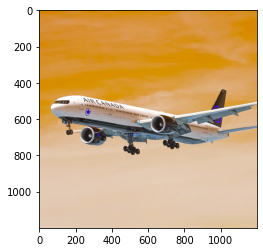

In [14]:
import cv2
# read image in BGR format
image = cv2.imread('notebook/plane.jpg')
print(image.shape)
plt.imshow(image)

(1200, 1200, 3)


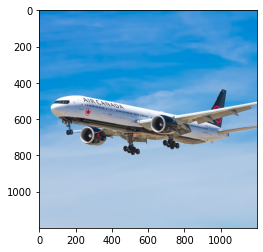

In [15]:
# BGR -> RGB
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)

In [16]:
import numpy as np
np.flip(img).shape

(1200, 1200, 3)

In [17]:
def inverse_pic(input_img):
    print(type(input_img))
    input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    return np.flip(input_img)

In [18]:
demo = gr.Interface(
    inverse_pic,
    gr.Image(show_label=True, label="Input Image"),
    "image",
    title="Image Transposer",
    description="Transpose Image",
)
demo.launch(inline=False, share=True)

Running on local URL:  http://127.0.0.1:7863
Running on public URL: https://60275d845b2354f46a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


<class 'numpy.ndarray'>


Integration with HF spaces either by creating a repo and then copying file in that repo and then pushing 
Alternative is programmatically pushing files in the repo by creating it first and then pushing from the source by code

In [ ]:
# from huggingface_hub import (
#     create_repo,
#     get_full_repo_name,
#     upload_file,
# )
# create_repo(name=target_space_name, token=hf_token, repo_type="space", space_sdk="gradio")

# repo_name = get_full_repo_name(model_id=target_space_name, token=hf_token)
# file_url = upload_file(
#     path_or_fileobj="file.txt",
#     path_in_repo="app.py",
#     repo_id=repo_name,
#     repo_type="space",
#     token=hf_token,
# )